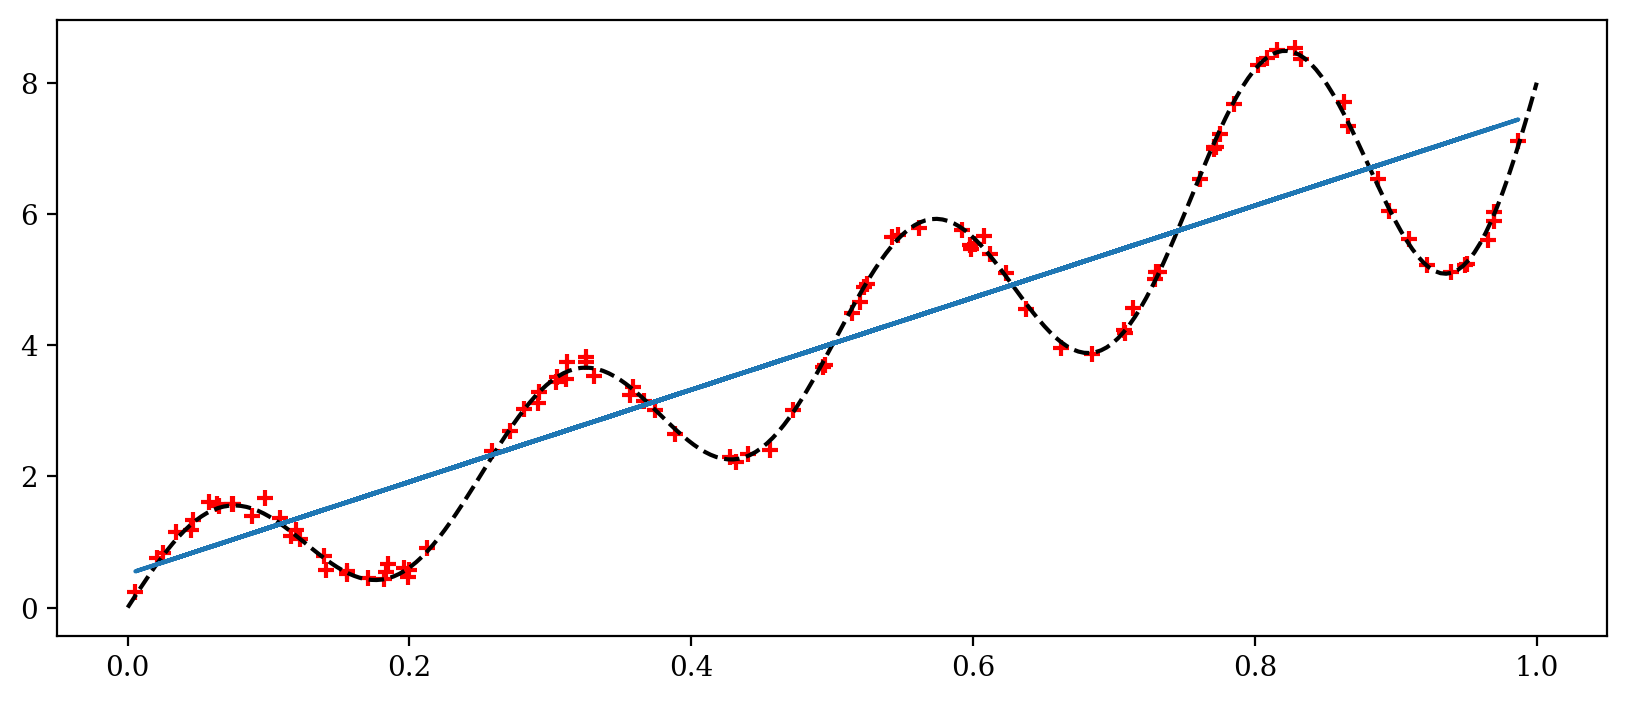

In [ ]:
import sys
sys.path.append("..")   # add parent folder (project/) to Python path

from jaxgp.gp import * 
from apak import * 

np.random.seed(42)
N_points = 100
x = np.random.uniform(0,1,N_points).reshape(-1,1)
func = lambda x: np.exp(x**2)*np.sin(8*math.pi*x) + 8*x
y = ( func(x) + np.random.randn(x.shape[0], x.shape[1])*1e-1).ravel()
xtest = np.linspace(0,1,250).reshape(-1,1)
ytest = func(xtest)

figure(figsize=(10,4), dpi=200)
scatter(x,y, marker = '+', color = 'red')
plot(xtest, ytest, linestyle = 'dashed', color = 'black', label = 'target')

Phi = jnp.hstack((jnp.ones((x.shape[0],1)), x))
beta = jnp.linalg.solve(Phi.T @ Phi + 1e-8 * jnp.eye(Phi.shape[1]), Phi.T @ y)
plot(x, Phi @ beta, label = "Least squares approximation")

In [3]:
model = SVGP(x, y, RBF, Linear, M = 20, noise_var = 1e-6, kernel_params = jnp.ones(2), epsilon = 1e-12, max_cond = 1e5, calibrate=True)
optimizer = ADAM(model, lambda model, p: svgp_neg_mll(model, p, N_mc = 25, seed = 42), beta1 = 0.9, beta2=0.999, constraints = model.constraints)

Calibrated white noise variance: 1.0804e-03


In [12]:
optimizer.run(1e-1, 1000, ['k_param', 'm_param'])

100%|██████████| 1000/1000 [00:10<00:00, 92.54it/s, Loss: 5.5525e+03]


{'Z': Array([[0.77513282],
        [0.00552212],
        [0.38867729],
        [0.98688694],
        [0.19598286],
        [0.59241457],
        [0.88721274],
        [0.4937956 ],
        [0.29214465],
        [0.09767211],
        [0.68423303],
        [0.83244264],
        [0.44015249],
        [0.54269608],
        [0.93949894],
        [0.72960618],
        [0.63755747],
        [0.14092422],
        [0.04645041],
        [0.33089802]], dtype=float64),
 'noise_var': Array(-6.82990824, dtype=float64),
 'k_param': Array([-3.390074  , -4.57579588], dtype=float64),
 'm_param': Array([0.47646634, 6.8819133 ], dtype=float64),
 'q_mu': Array([ 1.3522959 , -0.24896442, -0.52565895, -0.2345157 , -1.21681927,
         1.17031086, -0.1230335 , -0.22973225,  0.79803185,  0.53937246,
        -1.36996581,  2.09025768, -1.18466957,  1.40937446, -1.90740803,
        -0.43278508, -0.35395649, -0.86193441,  0.56366583,  0.76613445],      dtype=float64),
 'q_L': Array([[0.00108037, 0.        , 0.   

In [15]:
optimizer.run(1e-3, 5000, ['k_param', 'm_param', 'q_L', 'q_mu'])

100%|██████████| 5000/5000 [00:55<00:00, 89.93it/s, Loss: 2.0362e+03] 


{'Z': Array([[0.77513282],
        [0.00552212],
        [0.38867729],
        [0.98688694],
        [0.19598286],
        [0.59241457],
        [0.88721274],
        [0.4937956 ],
        [0.29214465],
        [0.09767211],
        [0.68423303],
        [0.83244264],
        [0.44015249],
        [0.54269608],
        [0.93949894],
        [0.72960618],
        [0.63755747],
        [0.14092422],
        [0.04645041],
        [0.33089802]], dtype=float64),
 'noise_var': Array(-6.82990824, dtype=float64),
 'k_param': Array([-4.42887   , -5.49247379], dtype=float64),
 'm_param': Array([0.13526981, 3.7686443 ], dtype=float64),
 'q_mu': Array([ 4.39801142,  0.15773722,  1.16960583,  3.04762048, -0.27595882,
         3.53739595,  3.19531067,  1.75388431,  2.12442317,  1.02363024,
         1.28553829,  5.31915524,  0.57504242,  3.42009051,  1.42790841,
         2.2136765 ,  2.1893517 ,  0.00532629,  1.05185745,  2.28530599],      dtype=float64),
 'q_L': Array([[ 1.84515942e-02,  0.00000000e

In [18]:
optimizer.run(1e-4, 5000, ['k_param', 'm_param', 'q_L', 'q_mu', 'Z'])

100%|██████████| 5000/5000 [00:56<00:00, 88.23it/s, Loss: 1.6639e+03] 


{'Z': Array([[0.7983855 ],
        [0.00552212],
        [0.37536497],
        [0.98688694],
        [0.17242401],
        [0.5973717 ],
        [0.87370914],
        [0.51288207],
        [0.28449747],
        [0.09816351],
        [0.63915905],
        [0.81869422],
        [0.38320681],
        [0.55780542],
        [0.97188895],
        [0.74714995],
        [0.61387534],
        [0.16926056],
        [0.04676974],
        [0.33383318]], dtype=float64),
 'noise_var': Array(-6.82990824, dtype=float64),
 'k_param': Array([-4.57965241, -5.97382014], dtype=float64),
 'm_param': Array([0.18453527, 4.09369769], dtype=float64),
 'q_mu': Array([ 4.84104099,  0.09639906,  1.25938648,  2.88329832, -0.48208188,
         3.11505598,  3.64957001,  2.32084675,  1.84319566,  0.8966379 ,
         1.88964725,  5.14310603,  1.10400218,  3.4452368 ,  1.95215912,
         2.8336068 ,  2.63926672, -0.43290975,  1.0249041 ,  2.12306065],      dtype=float64),
 'q_L': Array([[ 0.01102187,  0.        ,  0.

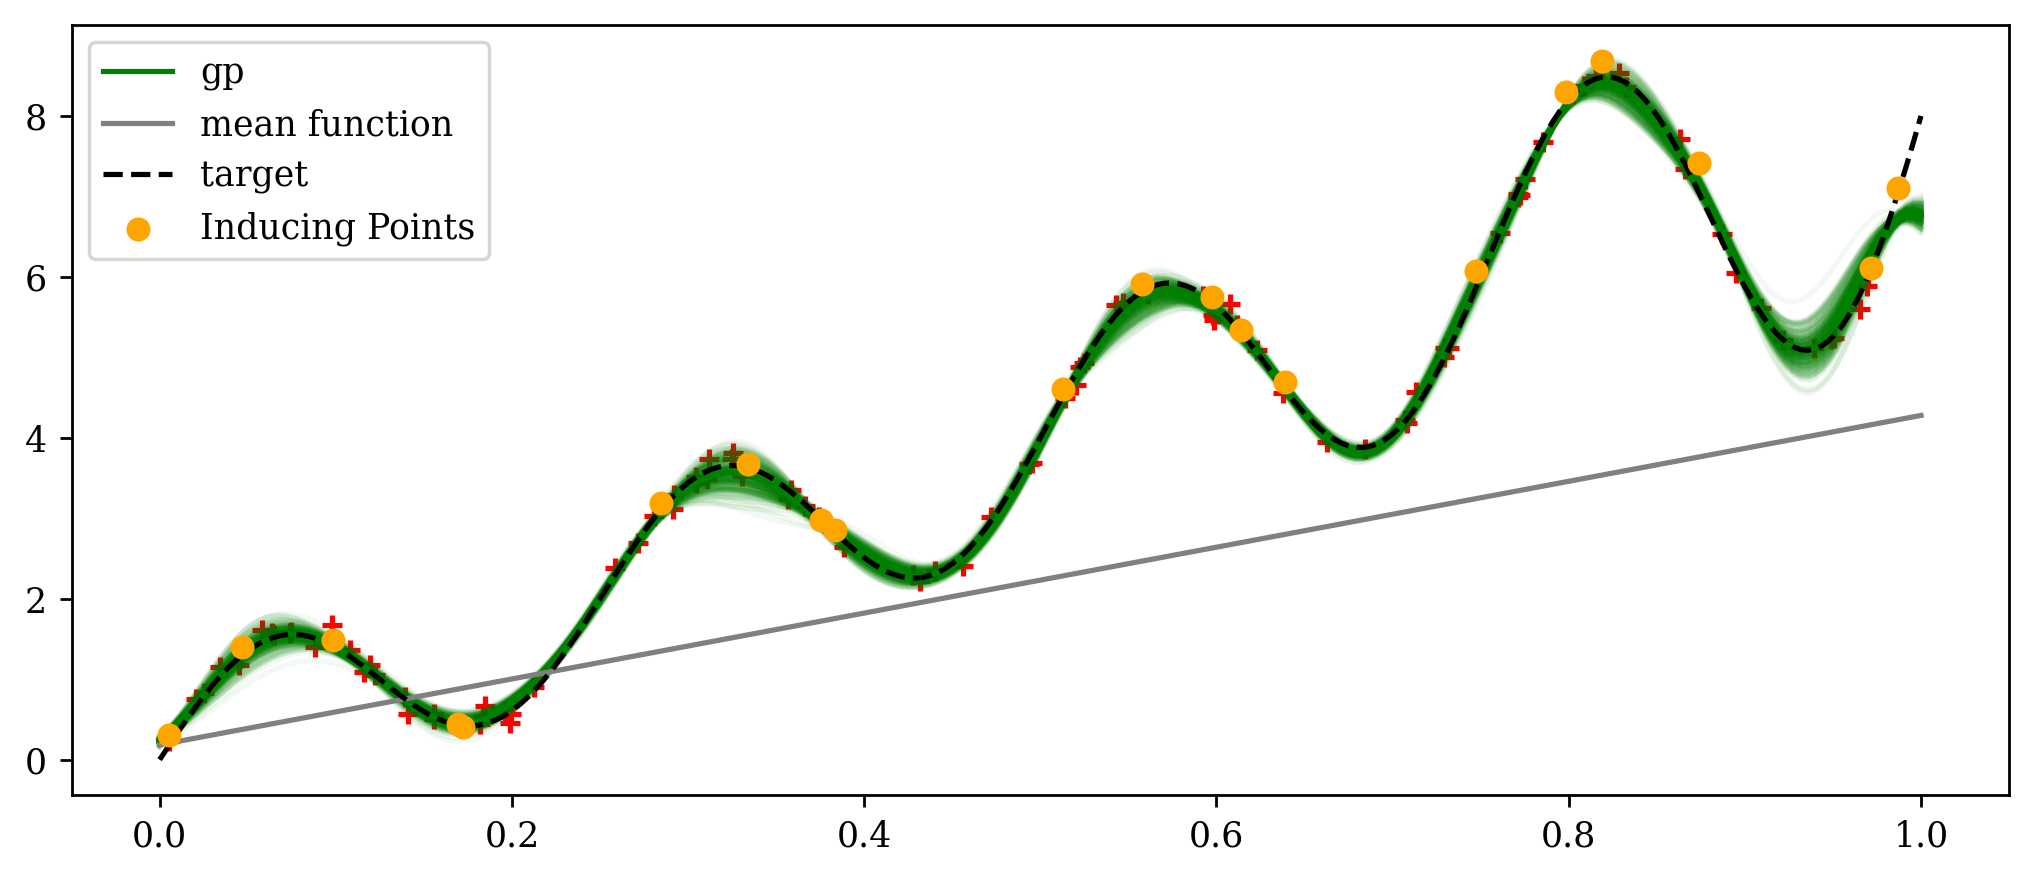

In [19]:
full_samp = model.predict(xtest, full_samp = True, N_mc = int(1e6), seed = 41)
figure(figsize=(10,4), dpi = 250)
scatter(x,y, marker = '+', color = 'red')
plot(xtest, full_samp.mean(axis=0), color = 'green', label = 'gp')
for i in range(full_samp.shape[1]):
    plot(xtest, full_samp[i,:], color = 'green', alpha = 0.05, zorder=1)
plot(xtest, model.mean.eval(xtest, model.p['m_param']), color = 'gray', label = 'mean function')
plot(xtest, ytest, linestyle = 'dashed', color = 'black', label = 'target')
scatter(model.p['Z'].ravel(), model.p['q_mu'] + model.mean.eval(model.p['Z'], model.p['m_param']), s = 35, color = 'orange', label = "Inducing Points", zorder=2)
legend()